

---


# Ce notebook illustre les effets principaux de la numérisation du son.


---
Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.


Pour pouvoir manipuler des sons avec python, il nous faut quelques "extensions" de python, que l'on va installer en lançant les deux cases ci-dessous.
Il faut bien patienter que l'exécution d'une case soit terminée avant de lancer la suivante.

Pré-requis : signal analogique, signal numérique, notion de stockage binaire et de taille de fichier

In [2]:
%pip install matplotlib
%pip install pydub
print("Installation réussie")

Installation réussie


In [3]:
%matplotlib inline
from ipywidgets import interactive,interact
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import locale
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


***

Pour stocker un son, il faut enregistrer le signal de pression de l'air en fonction du temps. Bien sûr, nos dispositifs de stockage ont une taille limitée et donc on ne peut stocker qu'un nombre limité de valeurs (quelques dizaines de milliards de valeurs sur une clé USB classique).


On est donc obligés d'**échantillonner** le signal, en ne mémorisant la pression de l'air que de temps en temps. La fréquence à laquelle on mémorise un échantillon du signal est appelée la **fréquence d'échantillonnage**. Autrement dit, si la fréquence d'échantillonnage vaut 200 Hz, on mémorise 200 points du signal pour chaque seconde du signal.

Le bloc ci-dessous vous permet de faire varier la fréquence d'échantillonnage lors de la numérisation d'un son.
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.
If it’s a note, you don’t have to include the word “Note”.
</div>

***


In [4]:
plt.rcParams.update({'font.size': 18})
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['axes.formatter.use_locale'] = True


Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample2(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = avg[0]
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  #signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après pour pas les perdre
  signal_sample = signech
  return(signal_sample)


def f(f_echantillonnage):

    fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(18,8))
    bit_qt = 64

    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    axs[0].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")

    signalech = sample2(signal,x,f_echantillonnage,bit_qt)

    tech = np.linspace(Tmin,Tmax,int((Tmax-Tmin)*f_echantillonnage)+1) #pb avec le step ici -> asservi au fenêtrage temporel
    axs[0].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2,label = "échantillonnage")

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #ax.set_title("Enregistrement")
    """
    axs[0].grid(which='major', color='#DDDDDD', linewidth=2)
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)
    axs[0].minorticks_on()"""
    axs[0].legend(loc="best")




    axs[1].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")


    axs[1].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2)

    minloc,maxloc=(np.min(signal),np.max(signal))
    for line in range(len(tech)-1):
      axs[0].plot((tech[line]*1000,tech[line]*1000),(minloc,maxloc),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.5)

      if line ==0 :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2,label="signal échantillonné")
      else :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2)
    #signalech = sample2(signal,x,f_echantillonnage,bit_qt)
    #axs[1].plot(x*1000, signalech ,color = 'red',linewidth = 2,label = "signal échantillonné")

    axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Temps (ms)")
    axs[0].set_title("Fréquence d'échantillonnage : {} Hz".format(f_echantillonnage))
    """
    axs[1].grid(which='major', color='#DDDDDD', linewidth=2)
    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)
    axs[1].minorticks_on()"""
    axs[1].legend(loc="best")
    plt.show()


interactive_plot = interactive(f, f_echantillonnage=(100, 2000,100))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot



interactive(children=(IntSlider(value=1000, description='f_echantillonnage', max=2000, min=100, step=100), Out…

 L'échantillonnage est un compromis : on voit que l'allure du signal échantillonné diffère du signal initial entre deux échantillons successifs!

 Pour un son d'1 seconde, on pourrait enregistrer 1000 points (1 toutes les millisecondes), 1 million de points (1 toutes les microsecondes), 1 milliard de points (1 toutes les nanosecondes) etc..

 Plus on veut être précis en enregistrant un signal fidèle au signal analogique, plus le fichier sera lourd!

In [ ]:
Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)
  #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = np.mean(avg)
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
  #attention c'est une qtfication centrée

  return(signal_sample)


def f(freq_ech,bit_qt):


    fig,ax = plt.subplots(figsize=(13,5))



    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    ax.plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5)

    signalech = sample(signal,x,freq_ech,bit_qt)

    ax.plot(x*1000, signalech ,color = 'black',linewidth = 2)

    ax.set_ylabel("Amplitude (V)")
    ax.set_xlabel("Temps (ms)")

    ax.set_title("Quantification")


    ax.grid(which='major', color='#DDDDDD', linewidth=2)

    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)

    ax.minorticks_on()

    minx,maxx = (np.min(x)*1000,np.max(x)*1000)
    (sign_min,sign_max) = (np.min(signal),np.max(signal))
    steploc = (sign_max-sign_min)/(2**bit_qt)
    for quantiline in range(2**bit_qt):
        ax.plot((minx,maxx),(sign_min+steploc*quantiline+steploc/2,sign_min+steploc*quantiline+steploc/2),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.05+np.max(((0.5-(2**bit_qt)/256),0)))


    plt.show()


interactive_plot = interactive(f, freq_ech=(100, 10000,100),bit_qt=(2,10,1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

#ajoouter la possibilité d'écouter, de jouer des morceaux pré-enregistrés, et d'écouter l'effet de la compression



interactive(children=(IntSlider(value=5000, description='freq_ech', max=10000, min=100, step=100), IntSlider(v…

In [ ]:

sound = []

sr = 22050 # sample rate encodage mp3

freq = 300
Tmin = 0
Tmax = 2/freq
points = int((Tmax-Tmin)*sr)

#freq_echan = 50000
#bit_qt = 32
x = np.linspace(Tmin, Tmax,points)

#signalech = sample(signal,x,freq_echan,bit_qt)

def Soundrand(son,freq_echan,bit_qty,signal_initial = False):
    global sound

    if son == "son pur":
      signal = np.sin(2*np.pi*x*freq)
      signalech = sample(signal,x,freq_echan,bit_qty)
      ysound = list(signalech)*500

      if signal_initial :
        ysound = list(signal)*500
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)
      else :
        sound = ipd.Audio(ysound, rate=sr, autoplay=True)



    elif son == "mario":
      duree=13

      audio_file = AudioSegment.from_file("mario2.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::4])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::4]
        signalech = sample(signal,x,freq_echan,bit_qty)
        ysound = list(signalech)*1
        sr3 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr3, autoplay=True)

    else :
      duree=18

      audio_file = AudioSegment.from_file("doom.wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::4])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::4]
        signalech = sample(signal,x,freq_echan,bit_qty)
        ysound = list(signalech)*1
        sr3 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr3, autoplay=True)



    #print(ysound)
    #x = 0.5*np.sin(2*np.pi*440*t)              # son pur sinusoïdal à 440 Hz
    sound = ipd.Audio(ysound, rate=sr, autoplay=True) # load a NumPy array

    return sound



#def f(freq_ech,bit_qty):
  #signal numérisé (échantillonné puis quantifié)

  #print(type(Soundrand(freq_ech,bit_qt)))
  #toplay = Soundrand(freq_ech,bit_qty)
  #toplay

  #Soundrand(freq_ech,bit_qty)
  #return(Soundrand(freq_ech,bit_qty))


#interactive_plot = interactive(f, freq_ech=(100, 10000,100),bit_qt=(2,10,1))
interactive_plot = interact(Soundrand, son =["son pur","mario","doom"],freq_echan=(100, 20000,1000),bit_qty=(2,10,1),son_initial=False)


#output = interactive_plot.children[-1]
#output.layout.height = '700px'
interactive_plot

print("got here")

interactive_plot
#WhereIWantToUseTheSound()
#Soundrand()




#FAIS GAFFE ! LE SAMPLE RATE IMPOSE LE STEP TEMPOREL PERÇU PAR LE MP3

interactive(children=(Dropdown(description='son', options=('son pur', 'mario', 'doom'), value='son pur'), IntS…

got here


<function __main__.Soundrand(son, freq_echan, bit_qty, signal_initial=False)>

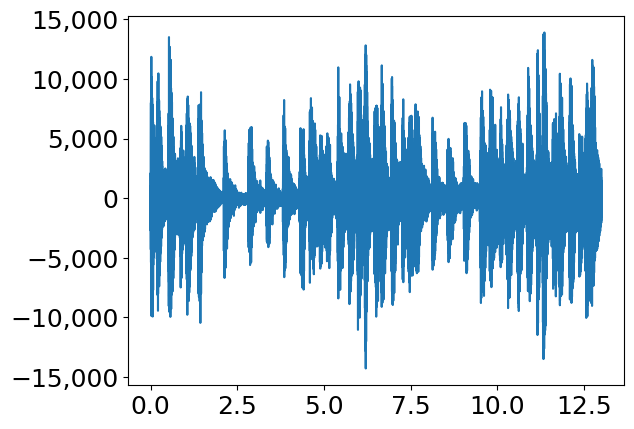

In [ ]:


# This will open and read the audio file with pydub.  Replace the file path with
# your own file.
audio_file = AudioSegment.from_file("./mario2.mp3")

"""
# Set up a list for us to dump PCM samples into, and create a 'data' variable
# so we don't need to type audio_file._data again
data = audio_file._data
pcm16_signed_integers = []

# This loop decodes the bytestring into PCM samples.
# The bytestring is a stream of little-endian encoded signed integers.
# This basically just cuts each two-byte sample out of the bytestring, converts
# it to an integer, and appends it to the list of samples.
for sample_index in range(len(data)//2):
    sample_audio = int.from_bytes(data[sample_index*2:sample_index*2+2], 'little', signed=True)
    pcm16_signed_integers.append(sample_audio)"""

samples = audio_file.get_array_of_samples()
samples = np.array(samples[::8])

# Now plot the samples!
duration = 13
time =np.linspace(0,duration,np.shape(samples)[0])

#plt.plot(pcm16_signed_integers)
#plt.plot(time[:100],samples[:100])
plt.plot(time[:],samples[:])
plt.show()

In [ ]:
np.shape(samples)

(141892,)

In [ ]:
samples

array([   47,   155,   228, ..., -1400, -1325, -1333], dtype=int16)

In [ ]:
!curl -OL https://gist.githubusercontent.com/fomightez/86482965bbce4bbbb7adb4c98f6cd9e6/raw/d31473699d8a2ec6d31dbf1d9590b8a0ef8972db/pydub_edit_plays_via_mybinder.ipynb
"""

Or step through the equivalent demonstration code in a notebook in JupyterLan by following these steps.
First enter in a cell the following:
"""

%pip install pydub

In [ ]:
!curl -OL http://www.nch.com.au/acm/8k16bitpcm.wav

In [ ]:
a = [1,2,2]
b = a*3
print(b)

[1, 2, 2, 1, 2, 2, 1, 2, 2]


In [ ]:
from pydub import AudioSegment
from pydub.playback import play

start = 1000
end = 3000
#audio = AudioSegment.from_file("8k16bitpcm.wav")
audio = AudioSegment.from_file("mario2.mp3")
audio_piece = audio[start:end]
audio_piece.export("test_clip.wav", format='wav')
from IPython.display import Audio, display
Audio("test_clip.wav", autoplay=True)